# Springboard Regression Case Study - The Red Wine Dataset - Tier 3

Welcome to the Springboard Regression case study! Please note: this is ***Tier 3*** of the case study.

This case study was designed for you to **use Python to apply the knowledge you've acquired in reading *The Art of Statistics* (hereinafter *AoS*) by Professor Spiegelhalter**. Specifically, the case study will get you doing regression analysis; a method discussed in Chapter 5 on p.121. It might be useful to have the book open at that page when doing the case study to remind you of what it is we're up to (but bear in mind that other statistical concepts, such as training and testing, will be applied, so you might have to glance at other chapters too).  

The aim is to ***use exploratory data analysis (EDA) and regression to predict alcohol levels in wine with a model that's as accurate as possible***. 

We'll try a *univariate* analysis (one involving a single explanatory variable) as well as a *multivariate* one (involving multiple explanatory variables), and we'll iterate together towards a decent model by the end of the notebook. The main thing is for you to see how regression analysis looks in Python and jupyter, and to get some practice implementing this analysis.

Throughout this case study, **questions** will be asked in the markdown cells. Try to **answer these yourself in a simple text file** when they come up. Most of the time, the answers will become clear as you progress through the notebook. Some of the answers may require a little research with Google and other basic resources available to every data scientist. 

For this notebook, we're going to use the red wine dataset, wineQualityReds.csv. Make sure it's downloaded and sitting in your working directory. This is a very common dataset for practicing regression analysis and is actually freely available on Kaggle, [here](https://www.kaggle.com/piyushgoyal443/red-wine-dataset).

You're pretty familiar with the data science pipeline at this point. This project will have the following structure: 
**1. Sourcing and loading** 
- Import relevant libraries
- Load the data 
- Exploring the data
- Choosing a dependent variable
 
**2. Cleaning, transforming, and visualizing**
- Visualizing correlations
  
  
**3. Modeling** 
- Train/Test split
- Making a Linear regression model: your first model
- Making a Linear regression model: your second model: Ordinary Least Squares (OLS) 
- Making a Linear regression model: your third model: multiple linear regression
- Making a Linear regression model: your fourth model: avoiding redundancy

**4. Evaluating and concluding** 
- Reflection 
- Which model was best?
- Other regression algorithms

### 1. Sourcing and loading

#### 1a. Import relevant libraries 

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
#Cross-sectional models and methods: Ordinary Least Squares,Weighted Least Squares etc
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
# Graphics of fit plots like Q-Q,Box-Plots, Corelation Plots,Dot Plot, Functional PLots, Regression Plots etc
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
# Calculates mean squared error, co-efficient of determination (r2-score)
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
# Split arrays or matrices into random train and test subsets
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#### 1b. Load the data

In [2]:
# Load the data. 
df=pd.read_csv("wineQualityReds.csv",index_col=0)

#### 1c. Exploring the data

In [3]:
# Check out its appearance. 
print(df.head(5).T)

                            1        2       3       4        5
fixed.acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile.acidity       0.7000   0.8800   0.760   0.280   0.7000
citric.acid            0.0000   0.0000   0.040   0.560   0.0000
residual.sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free.sulfur.dioxide   11.0000  25.0000  15.000  17.000  11.0000
total.sulfur.dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000


In [4]:
# Another very useful method to call on a recently imported dataset is .info(). Call it here to get a good
# overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


What can you infer about the nature of these variables, as output by the info() method?

Which variables might be suitable for regression analysis, and why? For those variables that aren't suitable for regression analysis, is there another type of statistical modeling for which they are suitable?

In [5]:
# We should also look more closely at the dimensions of the dataset. 
df.shape

(1599, 12)

#### 1d. Choosing a dependent variable

We now need to pick a dependent variable for our regression analysis: a variable whose values we will predict. 

'Quality' seems to be as good a candidate as any. Let's check it out. One of the quickest and most informative ways to understand a variable is to make a histogram of it. This gives us an idea of both the center and spread of its values. 

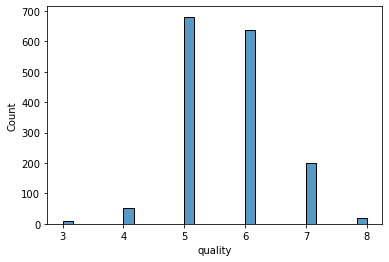

In [6]:
# Making a histogram of the quality variable.
sns.histplot(x="quality",data=df)
plt.show()

We can see so much about the quality variable just from this simple visualization. Answer yourself: what value do most wines have for quality? What is the minimum quality value below, and the maximum quality value? What is the range? Remind yourself of these summary statistical concepts by looking at p.49 of the *AoS*.

But can you think of a problem with making this variable the dependent variable of regression analysis? Remember the example in *AoS* on p.122 of predicting the heights of children from the heights of parents? Take a moment here to think about potential problems before reading on. 

The issue is this: quality is a *discrete* variable, in that its values are integers (whole numbers) rather than floating point numbers. Thus, quality is not a *continuous* variable. But this means that it's actually not the best target for regression analysis. 

Before we dismiss the quality variable, however, let's verify that it is indeed a discrete variable with some further exploration. 

In [7]:
# Get a basic statistical summary of the variable 
df.quality.describe()

# What do you notice from this summary? 

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [8]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The outputs of the describe() and value_counts() methods are consistent with our histogram, and since there are just as many values as there are rows in the dataset, we can infer that there are no NAs for the quality variable. 

But scroll up again to when we called info() on our wine dataset. We could have seen there, already, that the quality variable had int64 as its type. As a result, we had sufficient information, already, to know that the quality variable was not appropriate for regression analysis. Did you figure this out yourself? If so, kudos to you!

The quality variable would, however, conduce to proper classification analysis. This is because, while the values for the quality variable are numeric, those numeric discrete values represent *categories*; and the prediction of category-placement is most often best done by classification algorithms. You saw the decision tree output by running a classification algorithm on the Titanic dataset on p.168 of Chapter 6 of *AoS*. For now, we'll continue with our regression analysis, and continue our search for a suitable dependent variable. 

Now, since the rest of the variables of our wine dataset are continuous, we could — in theory — pick any of them. But that does not mean that are all equally sutiable choices. What counts as a suitable dependent variable for regression analysis is determined not just by *intrinsic* features of the dataset (such as data types, number of NAs etc) but by *extrinsic* features, such as, simply, which variables are the most interesting or useful to predict, given our aims and values in the context we're in. Almost always, we can only determine which variables are sensible choices for dependent variables with some **domain knowledge**. 

Not all of you might be wine buffs, but one very important and interesting quality in wine is [acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity). As the Waterhouse Lab at the University of California explains, 'acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are "flat." Chemically the acids influence titrable acidity which affects taste and pH which affects  color, stability to oxidation, and consequantly the overall lifespan of a wine.'

If we cannot predict quality, then it seems like **fixed acidity** might be a great option for a dependent variable. Let's go for that.

So if we're going for fixed acidity as our dependent variable, what we now want to get is an idea of *which variables are related interestingly to that dependent variable*. 

We can call the .corr() method on our wine data to look at all the correlations between our variables. As the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) shows, the default correlation coefficient is the Pearson correlation coefficient (p.58 and p.396 of the *AoS*); but other coefficients can be plugged in as parameters. Remember, the Pearson correlation coefficient shows us how close to a straight line the data-points fall, and is a number between -1 and 1. 

In [9]:
# Call the .corr() method on the wine dataset 
df.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Ok - you might be thinking, but wouldn't it be nice if we visualized these relationships? It's hard to get a picture of the correlations between the variables without anything visual. 

Very true, and this brings us to the next section.

### 2. Cleaning, Transforming, and Visualizing 

#### 2a. Visualizing correlations 
The heading of this stage of the data science pipeline ('Cleaning, Transforming, and Visualizing') doesn't imply that we have to do all of those operations in *that order*. Sometimes (and this is a case in point) our data is already relatively clean, and the priority is to do some visualization. Normally, however, our data is less sterile, and we have to do some cleaning and transforming first prior to visualizing. 

Now that we've chosen **fixed acidity** as our dependent variable for regression analysis, we can begin by plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

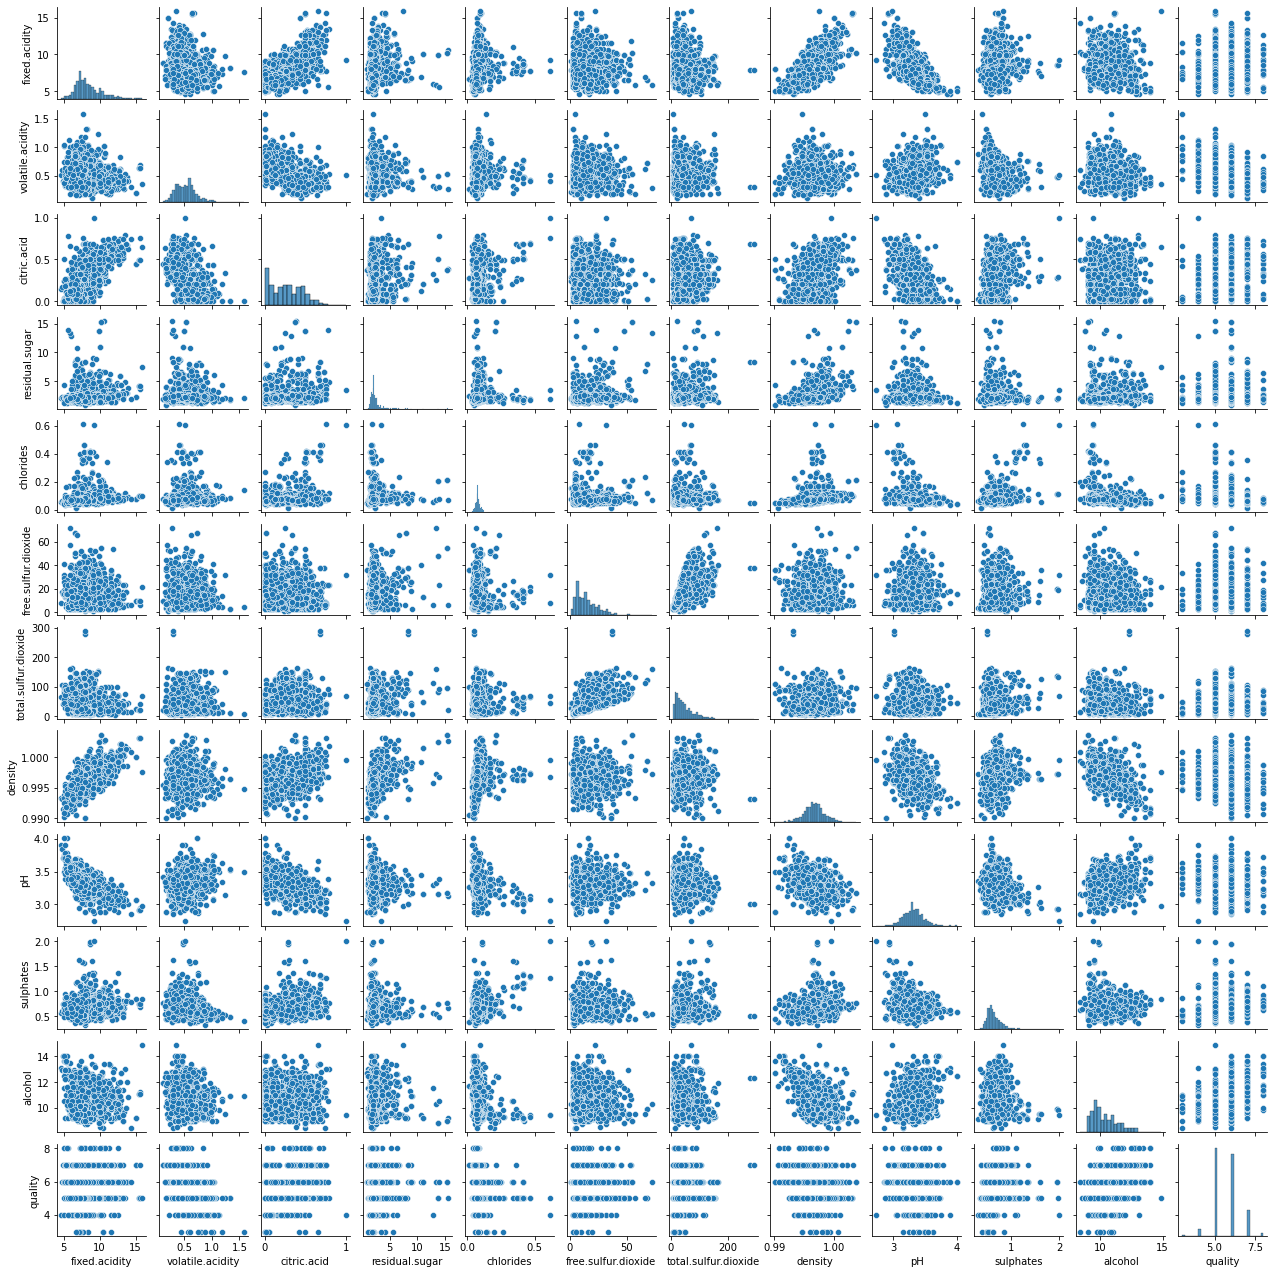

In [10]:
# Make a pairplot of the wine data
sns.pairplot(data=df,height=1.5)
plt.show()

If you've never executed your own Seaborn pairplot before, just take a moment to look at the output. They certainly output a lot of information at once. What can you infer from it? What can you *not* justifiably infer from it?

... All done? 

Here's a couple things you might have noticed: 
- a given cell value represents the correlation that exists between two variables 
- on the diagonal, you can see a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method instead makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.  
- the plots for the quality variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly right in not pursuing a regression analysis of this variable.
- Notice that some of the nice plots invite a line of best fit, such as alcohol vs density. Others, such as citric acid vs alcohol, are more inscrutable.

So we now have called the .corr() method, and the .pairplot() Seaborn method, on our wine data. Both have flaws. Happily, we can get the best of both worlds with a heatmap. 

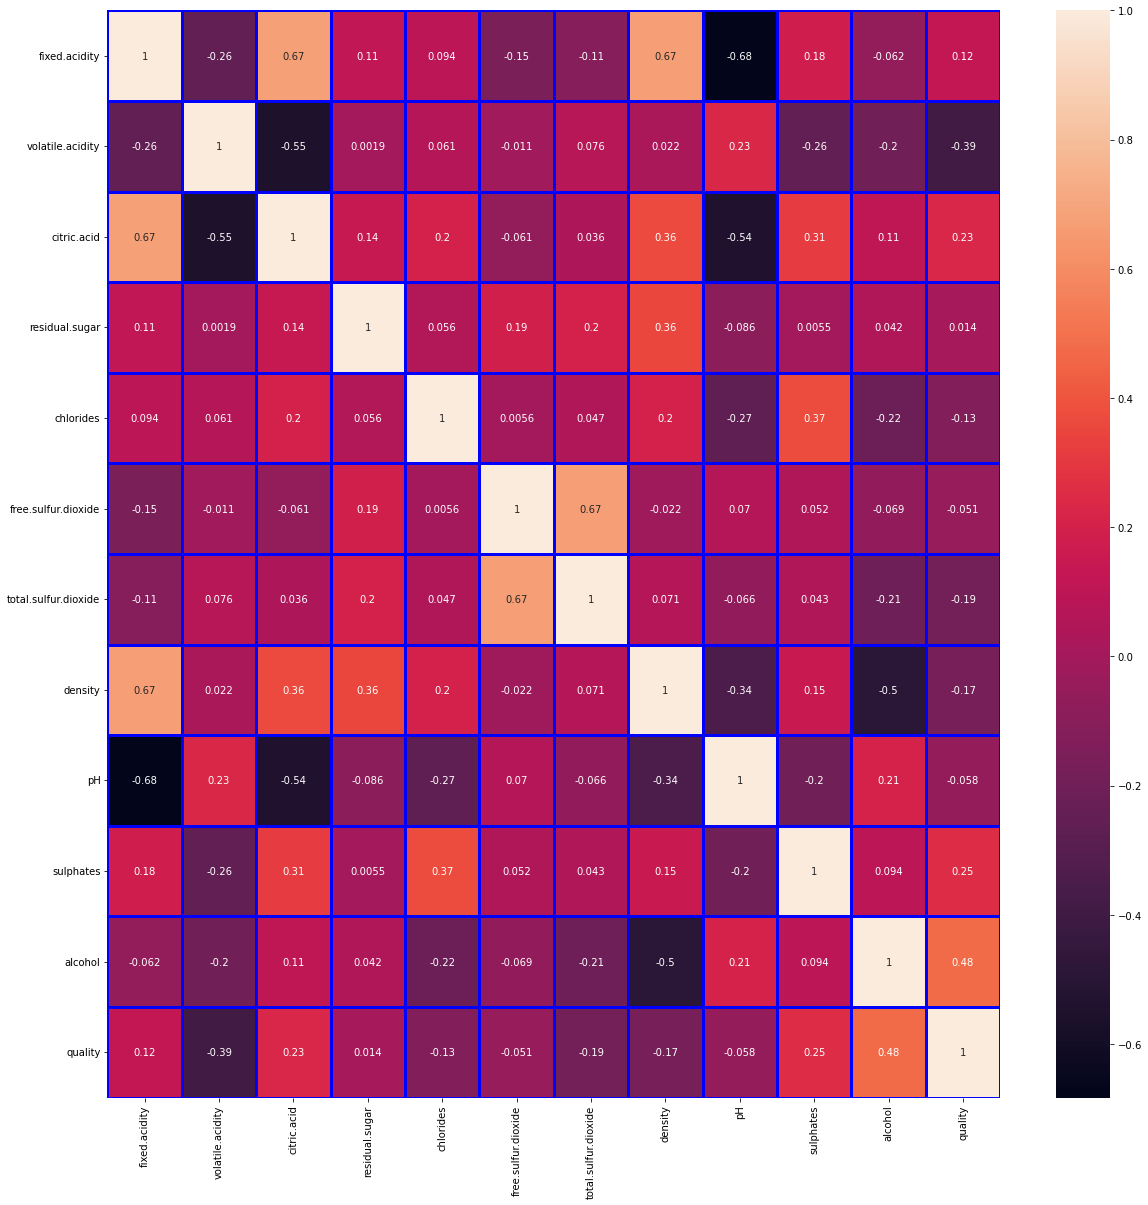

In [11]:
# Make a heatmap of the data 
## Source:https://www.statology.org/seaborn-heatmap/#:~:text=%20How%20to%20Make%20Heatmaps%20with%20Seaborn%20%28With,a...%204%20Annotate%20the%20Heatmap.%20%20More%20?msclkid=d0b9d42fc4fd11ec86b1595d56465cdf
corr=df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data=corr,annot=True,linewidths=3,linecolor="blue")
plt.show()

Take a moment to think about the following questions:
- How does color relate to extent of correlation?
- How might we use the plot to show us interesting relationships worth investigating? 
- More precisely, what does the heatmap show us about the fixed acidity variable's relationship to the density variable? 

There is a relatively strong correlation between the density and fixed acidity variables respectively. In the next code block, call the scatterplot() method on our sns object. Make the x-axis parameter 'density', the y-axis parameter 'fixed.acidity', and the third parameter specify our wine dataset.  

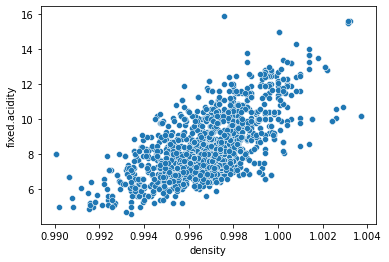

In [12]:
# Plot density against fixed.acidity
sns.scatterplot(x="density",y="fixed.acidity",data=df)
plt.show()

We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn. 

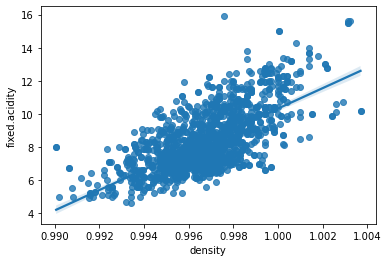

In [13]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
sns.regplot(x="density",y="fixed.acidity",data=df)
plt.show()

The line of best fit matches the overall shape of the data, but it's clear that there are some points that deviate from the line, rather than all clustering close. 

Let's see if we can predict fixed acidity based on density using linear regression. 

### 3. Modeling 

#### 3a. Train/Test Split
While this dataset is super clean, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

You'll recall from p.158 of *AoS* that such a split is important good practice when evaluating statistical models. On p.158, Professor Spiegelhalter was evaluating a classification tree, but the same applies when we're doing regression. Normally, we train with 75% of the data and test on the remaining 25%. 

To be sure, for our first model, we're only going to focus on two variables: fixed acidity as our dependent variable, and density as our sole independent predictor variable. 

We'll be using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) here. Don't worry if not all of the syntax makes sense; just follow the rationale for what we're doing. 

In [14]:
# Subsetting our data into our dependent and independent variables.
dffad=df[["fixed.acidity","density"]]
print(dffad.head())
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(dffad.drop(columns='fixed.acidity'), 
                                                    dffad["fixed.acidity"], test_size=0.25)


   fixed.acidity  density
1            7.4   0.9978
2            7.8   0.9968
3            7.8   0.9970
4           11.2   0.9980
5            7.4   0.9978


In [15]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print("X-Train,Test Shape",X_train.shape, X_test.shape)
print("y-Train,Test Shape",y_train.shape, y_test.shape)

X-Train,Test Shape (1199, 1) (400, 1)
y-Train,Test Shape (1199,) (400,)


#### 3b. Making a Linear Regression model: our first model
Sklearn has a [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function built into the linear_model module. We'll be using that to make our regression model. 

In [16]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel=linear_model.LinearRegression().fit(X_train, y_train)

In [17]:
# We now want to train the model on our test data.
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

In [18]:
# Evaluate the model  
print(" Train Data r2 ",r2_score(y_train, y_tr_pred),"\n", "Test Data r2", r2_score(y_test, y_te_pred))

 Train Data r2  0.4271362942104274 
 Test Data r2 0.4901731997464681


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 45% of the variation from the mean. There's more work to do!

In [19]:
# Use the model to make predictions about our test data
y_te_pred = rModel.predict(X_test)

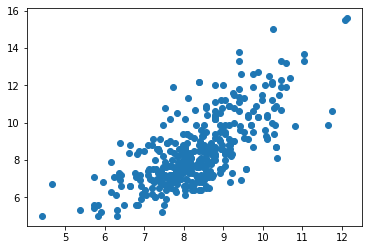

In [20]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_te_pred,y_test)
plt.show()

The above scatterplot represents how well the predictions match the actual results. 

Along the x-axis, we have the actual fixed acidity, and along the y-axis we have the predicted value for the fixed acidity.

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate: wines with an actual fixed acidity of just over 10 have been predicted as having acidity levels from about 6.3 to 13.

Let's build a similar model using a different package, to see if we get a better result that way.

#### 3c. Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [21]:
# Create the test and train sets. Here, we do things slightly differently.  
# We make the explanatory variable X as before.
#_ _ _

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.
# Further explanation of this can be found here: 
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
Y = df['fixed.acidity']
X = df['density']
X = sm.add_constant(X)


In [22]:
# The rest of the preparation is as before.
# Split the data using train_test_split()
#_ _ _
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(" Cross check if the constant is added \n",X_train[:4])
print(" Cross check y_train\n",y_train[:4])
print("X-Train,Test Shape",X_train.shape, X_test.shape)
print("y-Train,Test Shape",y_train.shape, y_test.shape)


 Cross check if the constant is added 
       const  density
409     1.0  0.99700
1494    1.0  0.99636
1479    1.0  0.99808
1382    1.0  0.99534
 Cross check y_train
 409     10.4
1494     7.7
1479     7.1
1382     6.8
Name: fixed.acidity, dtype: float64
X-Train,Test Shape (1199, 2) (400, 2)
y-Train,Test Shape (1199,) (400,)


In [23]:
# Create the model
model=sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel1=model.fit()

In [24]:
# Evaluate the model with .summary()
rModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     919.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          2.38e-150
Time:                        22:16:24   Log-Likelihood:                -2009.9
No. Observations:                1199   AIC:                             4024.
Df Residuals:                    1197   BIC:                             4034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -598.1487     19.998    -29.910      0.000    -637.385    -558.913
density      608.4522     20.064     30.326      0.000     569.089     647.816
==============================================================================
Omnibus:                       88.998   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.304
Skew:                           0.664   Prob(JB):                     6.77e-25
Kurtosis:                       3.682   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One of the great things about Statsmodels (sm) is that you get so much information from the summary() method. 

There are lots of values here, whose meanings you can explore at your leisure, but here's one of the most important: the R-squared score is 0.455, the same as what it was with the previous model. This makes perfect sense, right? It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

Here's a useful link you can check out if you have the time: https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [25]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_test_pred=rModel1.predict(X_test)

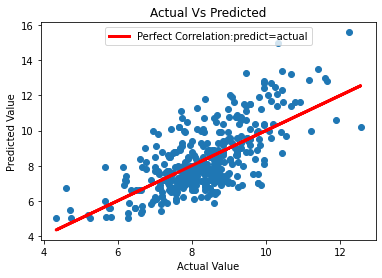

In [26]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test_pred,y_test)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot(y_test_pred,y_test_pred, color="red", linewidth=3,label="Perfect Correlation:predict=actual")

# Label it nicely
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Vs Predicted")
plt.legend(loc="upper center")
plt.show()


The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do. 

To get a better predictive model, we should use more than one variable.

#### 3d. Making a Linear Regression model: our third model: multiple linear regression
Remember, as Professor Spiegelhalter explains on p.132 of *AoS*, including more than one explanatory variable into a linear regression analysis is known as ***multiple linear regression***. 

In [27]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X1=df.drop(['fixed.acidity','quality'],axis=1)
Y1 = df['fixed.acidity']

# Create constants for X, so the model knows its bounds
X1 = sm.add_constant(X1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25)
print(" Cross check if the constant is added \n",X_train[:4])
print(" Cross check y_train\n",y_train[:4])
print("X-Train,Test Shape",X_train.shape, X_test.shape)
print("y-Train,Test Shape",y_train.shape, y_test.shape)

 Cross check if the constant is added 
       const  volatile.acidity  citric.acid  residual.sugar  chlorides  \
522     1.0              0.41         0.49             2.0      0.088   
1263    1.0              0.45         0.38             2.5      0.081   
1002    1.0              0.35         0.38             1.5      0.058   
69      1.0              0.32         0.57             2.0      0.074   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
522                  16.0                  43.0  0.99800  3.48       0.64   
1263                 34.0                  66.0  0.99726  3.15       0.58   
1002                 31.0                  47.0  0.99676  3.26       0.82   
69                   27.0                  65.0  0.99690  3.28       0.79   

      alcohol  
522       9.1  
1263      9.8  
1002     10.6  
69       10.7  
 Cross check y_train
 522     7.6
1263    9.8
1002    9.9
69      9.3
Name: fixed.acidity, dtype: float64
X-Train,Test Shape (11

In [28]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
model=sm.OLS(y_train,X_train)
# Fit the model
rModel2=model.fit()

In [29]:
# Evaluate the model
rModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     817.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:16:46   Log-Likelihood:                -1122.8
No. Observations:                1199   AIC:                             2268.
Df Residuals:                    1188   BIC:                             2324.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -625.4796     14.880    -42.035      0.000    -654.674    -596.286
volatile.acidity         0.3387      0.131      2.580      0.010       0.081       0.596
citric.acid              1.9211      0.150     12.770      0.000       1.626       2.216
residual.sugar          -0.2548      0.015    -16.818      0.000      -0.285      -0.225
chlorides               -3.4953      0.442     -7.907      0.000      -4.363      -2.628
free.sulfur.dioxide      0.0098      0.002      4.120      0.000       0.005       0.015
total.sulfur.dioxide    -0.0066      0.001     -8.374      0.000      -0.008      -0.005
density                648.3401     14.815     43.763      0.000     619.274     677.406
pH                      -5.2684      0.145    -36.417      0.000      -5.552      -4.985
sulphates               -0.7529      0.122     -6.147      0.000      -0.993      -0.513
alcohol                  0.5671      0.025     23.009      0.000       0.519       0.616
==============================================================================
Omnibus:                       61.744   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.295
Skew:                           0.232   Prob(JB):                     7.75e-37
Kurtosis:                       4.764   Cond. No.                     7.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared score shows a big improvement - our first model predicted only around 45% of the variation, but now we are predicting 87%!

In [30]:
# Use our new model to make predictions
y_test_pred=rModel2.predict(X_test)

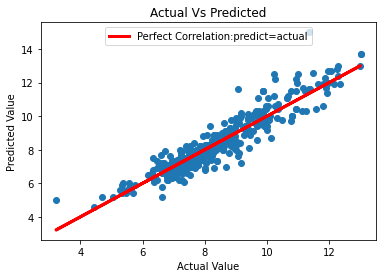

In [31]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test_pred,y_test)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot(y_test_pred,y_test_pred, color="red", linewidth=3,label="Perfect Correlation:predict=actual")
# Label it nicely
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Vs Predicted")
plt.legend(loc="upper center")
plt.show()


We've now got a much closer match between our data and our predictions, and we can see that the shape of the data points is much more similar to the red line. 

We can check another metric as well - the RMSE (Root Mean Squared Error). The MSE is defined by Professor Spiegelhalter on p.393 of *AoS*, and the RMSE is just the square root of that value. This is a measure of the accuracy of a regression model. Very simply put, it's formed by finding the average difference between predictions and actual values. Check out p. 163 of *AoS* for a reminder of how this works. 

In [32]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def rmse(y, ypred):
    """Roor Mean square error.
    
    Calculate the root mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    rmse=np.sqrt(mse)
    return rmse


In [53]:
# Get predictions from rModel3
print("rmse:",rmse(y_test,y_test_pred),"\n")

# Put the predictions & actual values into a dataframe
df_test = pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_pred},columns=['y_test','y_test_pred'])
print("df_test dataframe cross check","\n", df_test.head(3),"\n\n")
print(" Name of columns in the dataframe","\n",df_test.columns,"\n\n")
df_test.info()


rmse: 0.6492880452453126 

df_test dataframe cross check 
       y_test  y_test_pred
1204     9.9     9.015377
45       6.8     6.667351
861      7.2     6.656600 


 Name of columns in the dataframe 
 Index(['y_test', 'y_test_pred'], dtype='object') 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1204 to 832
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   y_test       400 non-null    float64
 1   y_test_pred  400 non-null    float64
dtypes: float64(2)
memory usage: 9.4 KB


The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away from the correct answer. That's not bad at all.

#### 3e. Making a Linear Regression model: our fourth model: avoiding redundancy 

We can also see from our early heat map that volatile.acidity and citric.acid are both correlated with pH. We can make a model that ignores those two variables and just uses pH, in an attempt to remove redundancy from our model.

In [54]:
# Create test and train datasets
# Include the remaining six columns as predictors
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X2=df.drop(['fixed.acidity','quality','volatile.acidity','citric.acid'],axis=1)
Y2 = df['fixed.acidity']

# Create constants for X, so the model knows its bounds
X2 = sm.add_constant(X2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25)
print(" Cross check if the constant is added \n",X_train[:4])
print(" Cross check y_train\n",y_train[:4])
print("X-Train,Test Shape",X_train.shape, X_test.shape)
print("y-Train,Test Shape",y_train.shape, y_test.shape)


 Cross check if the constant is added 
      const  residual.sugar  chlorides  free.sulfur.dioxide  \
156    1.0             5.5      0.071                 28.0   
831    1.0             2.5      0.058                  5.0   
194    1.0             2.2      0.071                  7.0   
154    1.0             1.8      0.095                 25.0   

     total.sulfur.dioxide  density    pH  sulphates  alcohol  
156                 128.0  0.99730  3.42       0.71     10.5  
831                   9.0  0.99632  3.38       0.55     10.9  
194                  28.0  0.99640  3.28       0.55      9.7  
154                  99.0  0.99500  3.35       0.54     10.1  
 Cross check y_train
 156    7.1
831    7.5
194    7.6
154    7.5
Name: fixed.acidity, dtype: float64
X-Train,Test Shape (1199, 9) (400, 9)
y-Train,Test Shape (1199,) (400,)


In [55]:
# Create the fifth model
model=sm.OLS(y_train,X_train)
# Fit the model
rModel3=model.fit()
# Evaluate the model
rModel3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     853.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:26:03   Log-Likelihood:                -1242.6
No. Observations:                1199   AIC:                             2503.
Df Residuals:                    1190   BIC:                             2549.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -713.2016     14.726    -48.431      0.000    -742.094    -684.310
residual.sugar          -0.2646      0.016    -16.845      0.000      -0.295      -0.234
chlorides               -2.8536      0.459     -6.218      0.000      -3.754      -1.953
free.sulfur.dioxide      0.0048      0.002      1.908      0.057      -0.000       0.010
total.sulfur.dioxide    -0.0051      0.001     -6.196      0.000      -0.007      -0.003
density                738.7506     14.539     50.810      0.000     710.225     767.276
pH                      -6.2985      0.142    -44.358      0.000      -6.577      -6.020
sulphates               -0.5527      0.130     -4.243      0.000      -0.808      -0.297
alcohol                  0.7174      0.024     29.767      0.000       0.670       0.765
==============================================================================
Omnibus:                      120.174   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.753
Skew:                           0.580   Prob(JB):                     1.08e-61
Kurtosis:                       5.068   Cond. No.                     6.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score has reduced, showing us that actually, the removed columns were important.

### Conclusions & next steps

Congratulations on getting through this implementation of regression and good data science practice in Python! 

Take a moment to reflect on which model was the best, before reading on.

.
.
.

Here's one conclusion that seems right. While our most predictively powerful model was rModel2, this model had explanatory variables that were correlated with one another, which made some redundancy. Our most elegant and economical model was rModel3 - it used just a few predictors to get a good result. 

All of our models in this notebook have used the OLS algorithm - Ordinary Least Squares. There are many other regression algorithms, and if you have time, it would be good to investigate them. You can find some examples [here](https://www.statsmodels.org/dev/examples/index.html#regression). Be sure to make a note of what you find, and chat through it with your mentor at your next call.
